In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('daily-total-female-births-CA.csv', header= 0, parse_dates=[0])
serie_birth=pd.read_csv('daily-total-female-births-CA.csv', header= 0, parse_dates=[0], index_col='date', squeeze=True)

In [3]:
df.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [4]:
serie_birth.head()

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: births, dtype: int64

<AxesSubplot:>

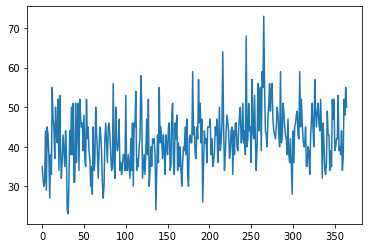

In [5]:
df['births'].plot() # don't dates, but indexes 0 to length of our data 

<AxesSubplot:xlabel='date'>

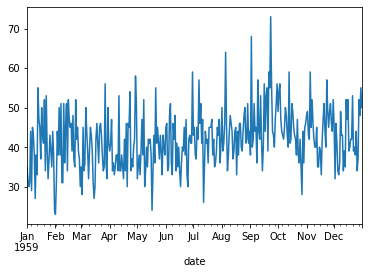

In [6]:
serie_birth.plot()

### zooming in the range time october

<AxesSubplot:xlabel='date'>

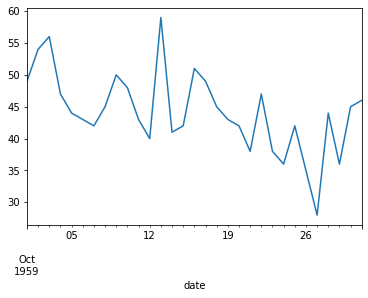

In [7]:
serie_birth['1959-10'].plot()

### Trendline

In [8]:
import seaborn as sns

<AxesSubplot:ylabel='births'>

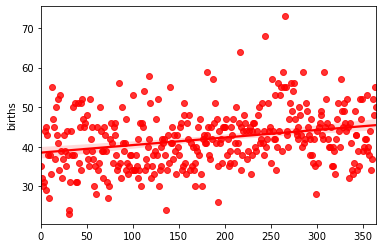

In [9]:
sns.regplot(x=df.index.values,y=df['births'],color='red')

<AxesSubplot:ylabel='births'>

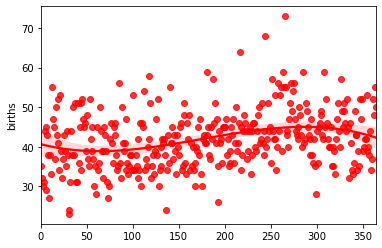

In [10]:
sns.regplot(x=df.index.values,y=df['births'],color='red',order=3) # by default the order = 1, 2 quadratic, 3 cubic

In [11]:
miles_df=pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', header=0, parse_dates=[0])

In [12]:
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


<AxesSubplot:>

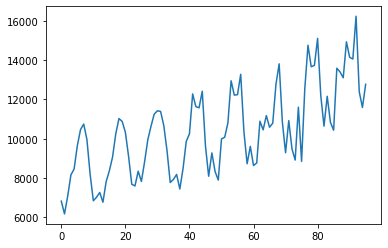

In [13]:
miles_df['MilesMM'].plot()

<AxesSubplot:ylabel='MilesMM'>

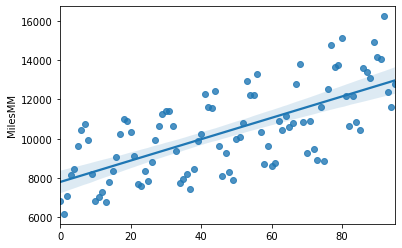

In [14]:
sns.regplot(x=miles_df.index, y=miles_df['MilesMM'])

##### on remarque une saisonnalité et une tendance haussière

### removing seasonality

In [15]:
miles_df['Year']=miles_df['Month'].dt.year
miles_df.head()

,Month,MilesMM,Year
0,1963-01-01,6827,1963
1,1963-02-01,6178,1963
2,1963-03-01,7084,1963
3,1963-04-01,8162,1963
4,1963-05-01,8462,1963


In [16]:
miles_df.groupby('Year')['MilesMM'].mean()

Year
1963     8300.250000
1964     8849.333333
1965     9619.250000
1966     9929.500000
1967    10542.916667
1968    10747.916667
1969    11972.000000
1970    13124.750000
Name: MilesMM, dtype: float64

<AxesSubplot:xlabel='Year'>

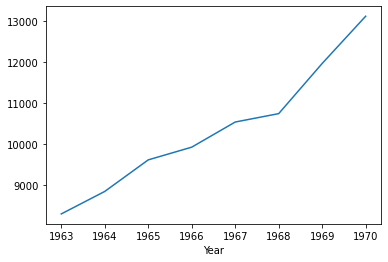

In [17]:
miles_df.groupby('Year')['MilesMM'].mean().plot()

### creating lag plot

In [18]:
miles_df['lag1']=miles_df['MilesMM'].shift(1)

In [19]:
miles_df.head()

,Month,MilesMM,Year,lag1
0,1963-01-01,6827,1963,NaN
1,1963-02-01,6178,1963,6827.0
2,1963-03-01,7084,1963,6178.0
3,1963-04-01,8162,1963,7084.0
4,1963-05-01,8462,1963,8162.0


<AxesSubplot:xlabel='lag1', ylabel='MilesMM'>

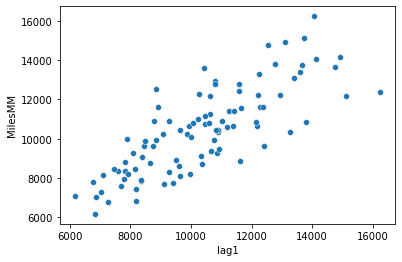

In [20]:
sns.scatterplot(x=miles_df['lag1'],y=miles_df['MilesMM'])

In [21]:
from pandas.plotting import lag_plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

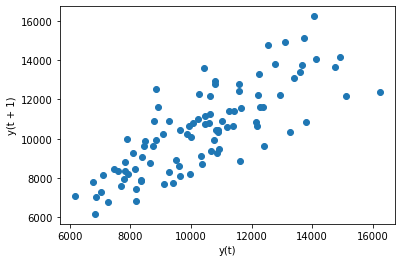

In [22]:
lag_plot(miles_df['MilesMM']) # par défaut lag1

### autocorrélation plot

In [23]:
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

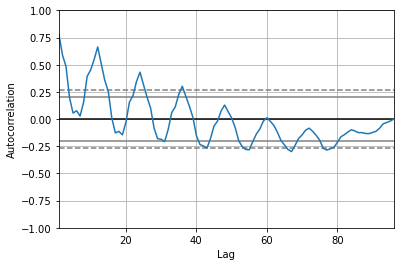

In [24]:
autocorrelation_plot(miles_df['MilesMM'])